In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Downloads/Smart_Risk_Advisor_Business_Data.csv")

# Preview the dataset
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            500 non-null    object 
 1   Business_Sector        500 non-null    object 
 2   Monthly_Revenue        500 non-null    int64  
 3   Monthly_Expense        500 non-null    int64  
 4   Customer_Churn_Risk    500 non-null    float64
 5   Complaint_Count        500 non-null    int64  
 6   Payment_Delay_Days     500 non-null    int64  
 7   Operational_Incidents  500 non-null    int64  
 8   Risk_Flag              500 non-null    object 
 9   Profit                 500 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 39.2+ KB


In [5]:
df.head()

,Customer_ID,Business_Sector,Monthly_Revenue,Monthly_Expense,Customer_Churn_Risk,Complaint_Count,Payment_Delay_Days,Operational_Incidents,Risk_Flag,Profit
0,CUST1000,Manufacturing,19397,21574,0.75,1,51,0,High,-2177
1,CUST1001,Healthcare,46555,12184,0.03,1,58,2,High,34371
2,CUST1002,Finance,51959,22096,0.89,3,20,4,High,29863
3,CUST1003,Healthcare,5728,70728,0.86,2,24,0,High,-65000
4,CUST1004,Healthcare,55517,37016,0.46,3,27,1,Low,18501


In [11]:
# Basic EDA
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Summary stats:\n", df.describe())


Shape: (500, 10)
Missing values:
 Customer_ID              0
Business_Sector          0
Monthly_Revenue          0
Monthly_Expense          0
Customer_Churn_Risk      0
Complaint_Count          0
Payment_Delay_Days       0
Operational_Incidents    0
Risk_Flag                0
Profit                   0
dtype: int64
Summary stats:
        Monthly_Revenue  Monthly_Expense  Customer_Churn_Risk  Complaint_Count  \
count       500.000000        500.00000           500.000000       500.000000   
mean      50256.582000      46566.81200             0.503740         1.976000   
std       28111.165054      24806.54705             0.283167         1.350211   
min        5055.000000       3060.00000             0.000000         0.000000   
25%       25616.250000      26214.50000             0.250000         1.000000   
50%       48016.000000      45667.00000             0.530000         2.000000   
75%       75883.500000      67671.50000             0.750000         3.000000   
max       99456.000

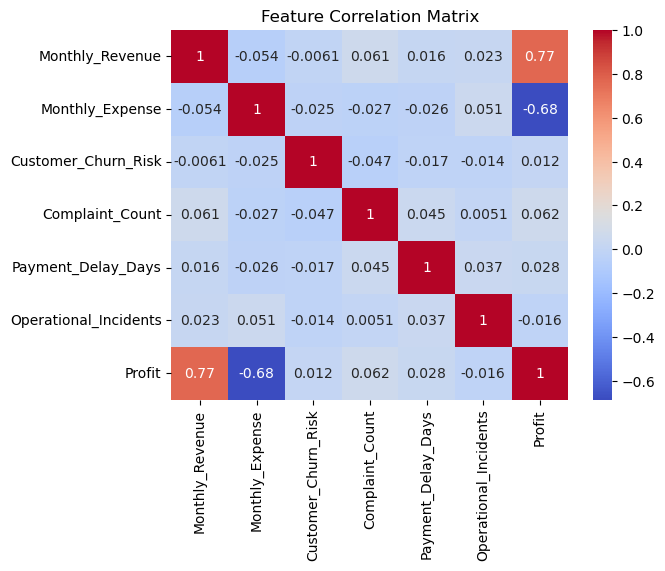

In [15]:
# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Now run the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


In [17]:
# Drop non-numeric ID columns
df = df.drop(columns=['Customer_ID'], errors='ignore')  # Only if present

# Define features and target
X = df.drop('Profit', axis=1)
y = df['Profit']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (400, 8)
Testing shape: (100, 8)


In [21]:
# Drop non-numeric ID columns
df = df.drop(columns=['customer_ID'], errors='ignore')

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('Profit', axis=1)
y = df['Profit']


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ MAE:", round(mae, 2))
print("✅ R² Score:", round(r2, 3))


✅ MAE: 2948.11
✅ R² Score: 0.991


C:\Users\USER\AppData\Local\Temp\ipykernel_23600\2082883416.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
C:\Users\USER\AppData\Local\Temp\ipykernel_23600\2082883416.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


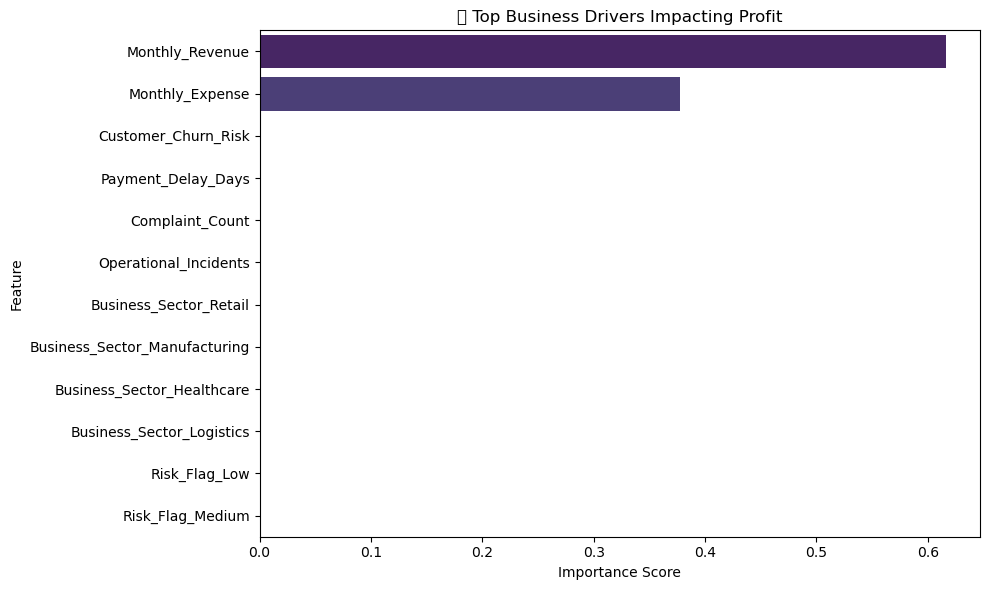

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("🔍 Top Business Drivers Impacting Profit")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [29]:
# Combine actual and predicted values
results_df = X_test.copy()
results_df['Actual_Profit'] = y_test.values
results_df['Predicted_Profit'] = y_pred

# Save to CSV
results_df.to_csv("Predicted_Profit_Output.csv", index=False)

print("✅ Prediction results saved as 'Predicted_Profit_Output.csv'")


✅ Prediction results saved as 'Predicted_Profit_Output.csv'


In [31]:
# Add risk recommendation based on predicted profit
def risk_advice(profit):
    if profit >= 40000:
        return '✅ Low Risk – Stable Profitability'
    elif 20000 <= profit < 40000:
        return '⚠️ Medium Risk – Monitor Operational KPIs'
    else:
        return '🚨 High Risk – Investigate Cost & Revenue Leaks'

# Apply to predicted column
results_df['Risk_Advice'] = results_df['Predicted_Profit'].apply(risk_advice)

# Save again with recommendations
results_df.to_csv("Smart_Risk_Advisor_Output.csv", index=False)

print("✅ Final output with Risk Advice saved as 'Smart_Risk_Advisor_Output.csv'")


✅ Final output with Risk Advice saved as 'Smart_Risk_Advisor_Output.csv'
